# CART - Diabet Prediction

Business Problem: Can you develop a machine learning model that can predict whether people have diabetes or not when their characteristics are specified? 
___

About Dataset: The dataset is part of the large dataset maintained at the National Institutes of Diabetes-Digestive-Kidney Diseases in the USA. Data used for diabetes research on Pima Indian women aged 21 years and older living in Phoenix, the 5th largest city of Arizona State in the USA. It consists of 768 observations and 8 numerical independent variables. The target variable is specified as "outcome"; 1 indicates positive diabetes test result, 0 indicates negative.
___

Variables:

Pregnancies: Number of pregnancies<br>
Glucose<br>
BloodPressure: Blood pressure.<br>
SkinThickness: Skin Thickness<br>
Insulin<br>
BMI: Body mass index.<br>
DiabetesPedigreeFunction: A function that calculates our probability of having diabetes based on our ancestry.<br>
Age: Age (years)<br>
Outcome: Information whether the person has diabetes or not. Have the disease (1) or not (0)<br>

**Import Libraries**

In [98]:
import warnings
import joblib
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from skompiler import skompile
import graphviz

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

warnings.simplefilter(action='ignore', category=Warning)

**Read data**

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 1) Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Check missing values**

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Check unique values**

In [6]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

**Check numerical variables**

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Numerical variables analysis**

In [8]:
def num_summary(dataframe, numerical_col, plot=False):
    print(numerical_col.upper())
    quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    print(dataframe[numerical_col].describe(quantiles).T)
    
    if plot:
        sns.histplot(data=dataframe, x=col)
# 
        plt.title(numerical_col)
        plt.xlabel(numerical_col)
        plt.show()
       
    print(100*'-', '\n')

PREGNANCIES
count    768.000000
mean       3.845052
std        3.369578
min        0.000000
10%        0.000000
20%        1.000000
30%        1.000000
40%        2.000000
50%        3.000000
60%        4.000000
70%        5.000000
80%        7.000000
90%        9.000000
max       17.000000
Name: Pregnancies, dtype: float64


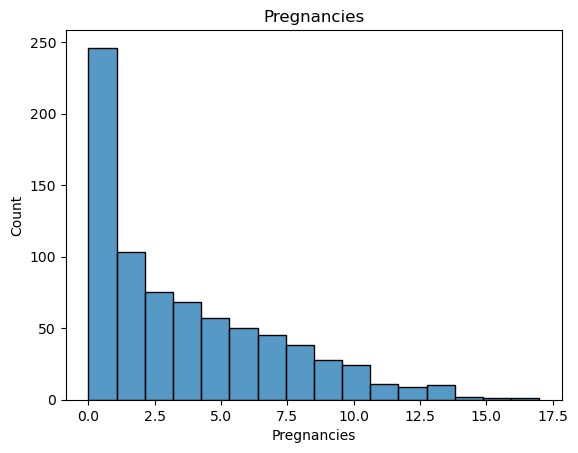

---------------------------------------------------------------------------------------------------- 

GLUCOSE
count    768.000000
mean     120.894531
std       31.972618
min        0.000000
10%       85.000000
20%       95.000000
30%      102.000000
40%      109.000000
50%      117.000000
60%      125.000000
70%      134.000000
80%      147.000000
90%      167.000000
max      199.000000
Name: Glucose, dtype: float64


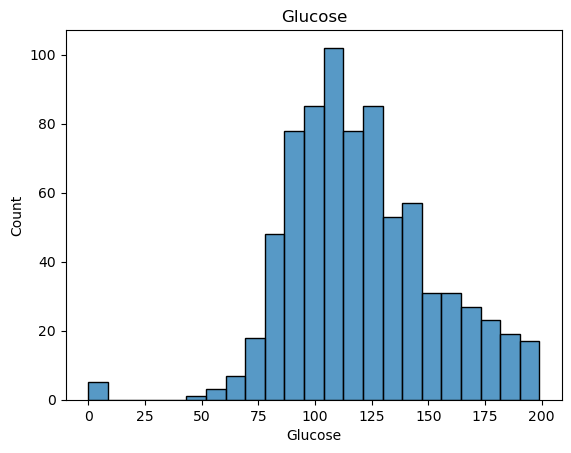

---------------------------------------------------------------------------------------------------- 

BLOODPRESSURE
count    768.000000
mean      69.105469
std       19.355807
min        0.000000
10%       54.000000
20%       60.000000
30%       64.000000
40%       68.000000
50%       72.000000
60%       74.000000
70%       78.000000
80%       82.000000
90%       88.000000
max      122.000000
Name: BloodPressure, dtype: float64


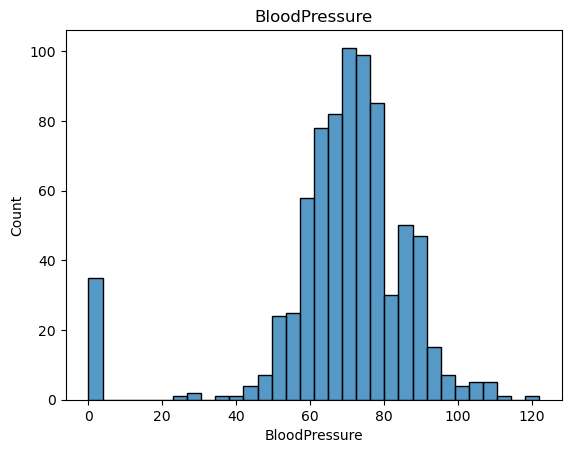

---------------------------------------------------------------------------------------------------- 

SKINTHICKNESS
count    768.000000
mean      20.536458
std       15.952218
min        0.000000
10%        0.000000
20%        0.000000
30%        8.200000
40%       18.000000
50%       23.000000
60%       27.000000
70%       31.000000
80%       35.000000
90%       40.000000
max       99.000000
Name: SkinThickness, dtype: float64


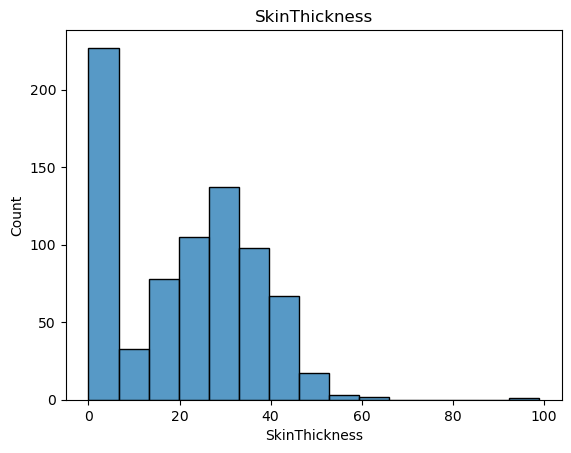

---------------------------------------------------------------------------------------------------- 

INSULIN
count    768.000000
mean      79.799479
std      115.244002
min        0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%       30.500000
60%       72.200000
70%      106.000000
80%      150.000000
90%      210.000000
max      846.000000
Name: Insulin, dtype: float64


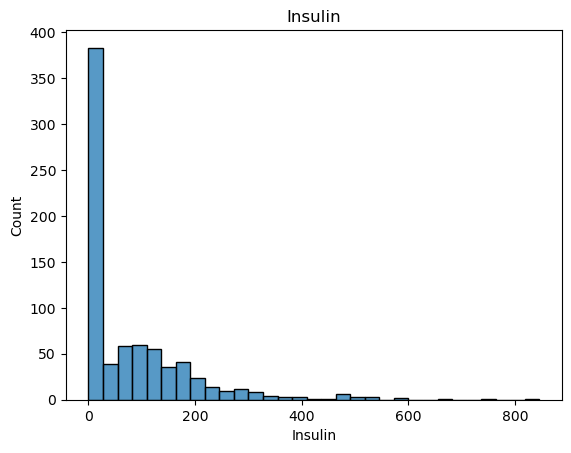

---------------------------------------------------------------------------------------------------- 

BMI
count    768.000000
mean      31.992578
std        7.884160
min        0.000000
10%       23.600000
20%       25.900000
30%       28.200000
40%       30.100000
50%       32.000000
60%       33.700000
70%       35.490000
80%       37.800000
90%       41.500000
max       67.100000
Name: BMI, dtype: float64


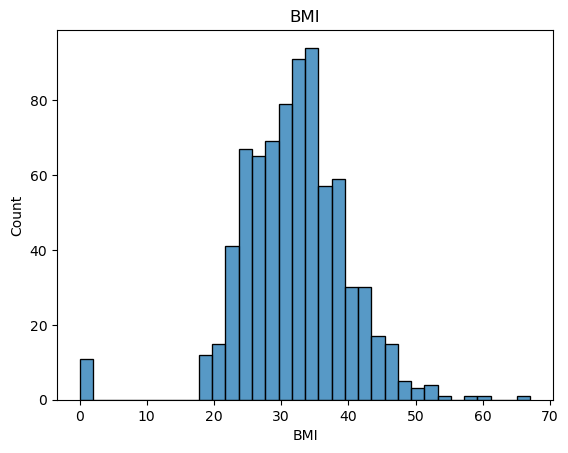

---------------------------------------------------------------------------------------------------- 

DIABETESPEDIGREEFUNCTION
count    768.000000
mean       0.471876
std        0.331329
min        0.078000
10%        0.165000
20%        0.219400
30%        0.259000
40%        0.302800
50%        0.372500
60%        0.454200
70%        0.563700
80%        0.687000
90%        0.878600
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64


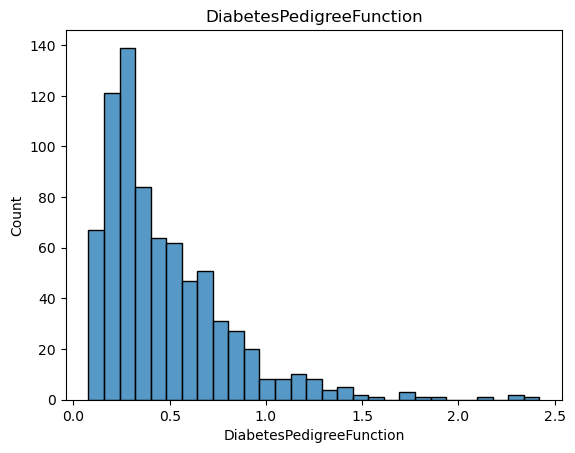

---------------------------------------------------------------------------------------------------- 

AGE
count    768.000000
mean      33.240885
std       11.760232
min       21.000000
10%       22.000000
20%       23.000000
30%       25.000000
40%       27.000000
50%       29.000000
60%       33.000000
70%       38.000000
80%       42.600000
90%       51.000000
max       81.000000
Name: Age, dtype: float64


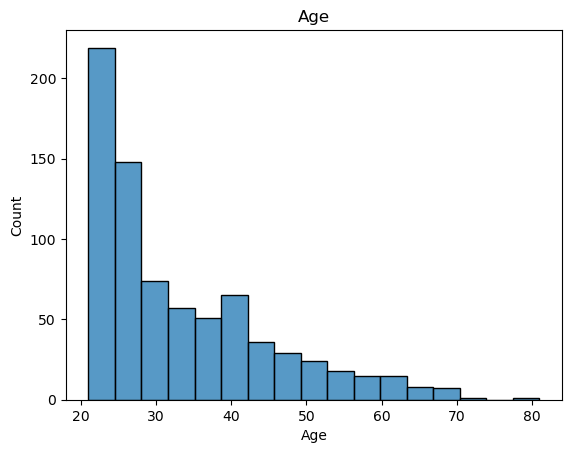

---------------------------------------------------------------------------------------------------- 



In [9]:
for col in df.columns[:-1]:
    num_summary(df, col, plot=True)

**Target variables analysis**

In [10]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       'Ratio': round(100*(dataframe[col_name].value_counts()) / len(dataframe), 2)}))
    
    if plot:
        sns.countplot(x=col_name, data=dataframe)
        plt.show()

   Outcome  Ratio
0      500   65.1
1      268   34.9


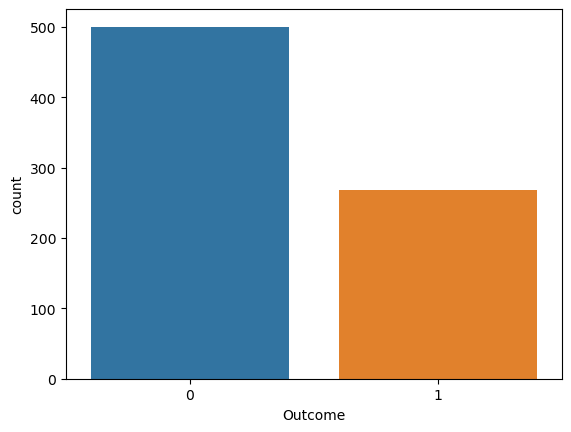

In [11]:
cat_summary(df, 'Outcome', plot=True)

In [12]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: 'mean'}))

In [13]:
for col in df.columns[:-1]:
    target_summary_with_num(df, 'Outcome', col)

         Pregnancies
Outcome             
0           3.298000
1           4.865672
            Glucose
Outcome            
0        109.980000
1        141.257463
         BloodPressure
Outcome               
0            68.184000
1            70.824627
         SkinThickness
Outcome               
0            19.664000
1            22.164179
            Insulin
Outcome            
0         68.792000
1        100.335821
               BMI
Outcome           
0        30.304200
1        35.142537
         DiabetesPedigreeFunction
Outcome                          
0                        0.429734
1                        0.550500
               Age
Outcome           
0        31.190000
1        37.067164


## 2) Data Preprocessing

**Outlier Control**

In [14]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [15]:
for col in df.columns[:-1]:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin True
BMI False
DiabetesPedigreeFunction False
Age False


**There is outliers in Insulin variable and we will replace them with limits**

In [16]:
replace_with_thresholds(df, 'Insulin')

In [17]:
print('Insulin', check_outlier(df, 'Insulin'))

Insulin False


**Scaling with Robust**

In [18]:
cols = df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [19]:
for col in cols:
    df[col] = RobustScaler().fit_transform(df[[col]])

In [20]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.6,0.751515,0.000000,0.37500,-0.239686,0.172043,0.665359,1.235294,1
1,-0.4,-0.775758,-0.333333,0.18750,-0.239686,-0.580645,-0.056209,0.117647,0
2,1.0,1.600000,-0.444444,-0.71875,-0.239686,-0.935484,0.783007,0.176471,1
3,-0.4,-0.678788,-0.333333,0.00000,0.499018,-0.419355,-0.537255,-0.470588,0
4,-0.6,0.484848,-1.777778,0.37500,1.080550,1.193548,5.007843,0.235294,1


## 3) Modelling

In [21]:
y = df[['Outcome']]
X = df.drop('Outcome', axis=1)

In [22]:
cart_model = DecisionTreeClassifier(random_state=1).fit(X, y)

**Prediction and probability**

In [23]:
y_predictions = cart_model.predict(X)

In [24]:
y_probability = cart_model.predict_proba(X)[:, 1]

**Report**

In [25]:
print(classification_report(y, y_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



**Roc AUC score**

In [26]:
roc_auc_score(y, y_probability)

1.0

## 4) Model Evaulation with Holdout

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

**Train Report**

In [28]:
cart_model = DecisionTreeClassifier(random_state=17).fit(X_train, y_train)
y_predict = cart_model.predict(X_train)
y_prob = cart_model.predict_proba(X_train)[:, 1]

In [29]:
print(classification_report(y_train, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       187

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



In [30]:
roc_auc_score(y_train, y_prob)

1.0

**Test Report**

In [31]:
y_predict = cart_model.predict(X_test)
y_prob = cart_model.predict_proba(X_test)[:, 1]

In [32]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       150
           1       0.58      0.57      0.58        81

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231



In [33]:
roc_auc_score(y_test, y_prob)

0.6739506172839506

## 5) Model Evaulation with Cross Validation

In [34]:
cart_model = DecisionTreeClassifier(random_state=17).fit(X, y)

In [35]:
cv_result = cross_validate(cart_model, X, y, cv=5, scoring=['accuracy', 'f1', 'roc_auc'])

In [36]:
cv_result

{'fit_time': array([0.00900602, 0.00598335, 0.00499034, 0.00597835, 0.00398874]),
 'score_time': array([0.00794649, 0.00698495, 0.00697947, 0.0059998 , 0.0039897 ]),
 'test_accuracy': array([0.7012987 , 0.65584416, 0.67532468, 0.78431373, 0.7254902 ]),
 'test_f1': array([0.54      , 0.56910569, 0.51923077, 0.66666667, 0.58      ]),
 'test_roc_auc': array([0.655     , 0.65407407, 0.635     , 0.74632075, 0.68358491])}

In [37]:
cv_result['test_accuracy'].mean()

0.708454290807232

In [38]:
cv_result['test_f1'].mean()

0.5750006253908693

In [39]:
cv_result['test_roc_auc'].mean()

0.6747959468902865

## 6) Hyperparameters

In [40]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

Most important parameters for CART are min_samples_split and max_depth

In [41]:
cart_params = {'max_depth': range(1, 11),
              'min_samples_split': range(2, 20)}

In [42]:
cart_best_grid = GridSearchCV(cart_model,
            cart_params,
            scoring='accuracy',
            cv=5,
            n_jobs=-1,
            verbose=1).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


**Get best params and score for accuracy**

In [43]:
cart_best_grid.best_params_

{'max_depth': 5, 'min_samples_split': 4}

In [44]:
cart_best_grid.best_score_

0.7500806383159324

**Get best params and score for f1 score**

In [45]:
cart_best_grid = GridSearchCV(cart_model,
            cart_params,
            scoring='f1',
            cv=5,
            n_jobs=-1,
            verbose=1).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [46]:
cart_best_grid.best_params_

{'max_depth': 4, 'min_samples_split': 2}

In [47]:
cart_best_grid.best_score_

0.6395752751155839

## 7) Final Model

In [48]:
cart_best_grid = GridSearchCV(cart_model,
            cart_params,
            scoring='accuracy',
            cv=5,
            n_jobs=-1,
            verbose=1).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [56]:
cart_final_model = DecisionTreeClassifier(**cart_best_grid.best_params_, random_state=17).fit(X, y)
cart_final_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

**Alternatif 2**

In [54]:
cart_final_model = cart_model.set_params(**cart_best_grid.best_params_).fit(X, y)

In [59]:
cv_results = cross_validate(cart_final_model,
                         X, y,
                         cv=5,
                         scoring=['accuracy', 'f1', 'roc_auc'])

In [60]:
cv_results

{'fit_time': array([0.00501442, 0.00498533, 0.00698447, 0.00598264, 0.00598335]),
 'score_time': array([0.00598478, 0.00595546, 0.00897574, 0.00797892, 0.00698185]),
 'test_accuracy': array([0.74675325, 0.68831169, 0.75324675, 0.79084967, 0.77124183]),
 'test_f1': array([0.59793814, 0.55555556, 0.59574468, 0.69230769, 0.63157895]),
 'test_roc_auc': array([0.81537037, 0.72333333, 0.80518519, 0.83962264, 0.8054717 ])}

In [61]:
cv_results['test_accuracy'].mean()

0.7500806383159324

In [62]:
cv_results['test_f1'].mean()

0.614625004082526

In [63]:
cv_results['test_roc_auc'].mean()

0.797796645702306

## 8) Feature Importance

In [64]:
cart_final_model.feature_importances_

array([0.01129738, 0.49448119, 0.05065617, 0.        , 0.01497644,
       0.22221379, 0.06819923, 0.13817579])

In [69]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 5))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

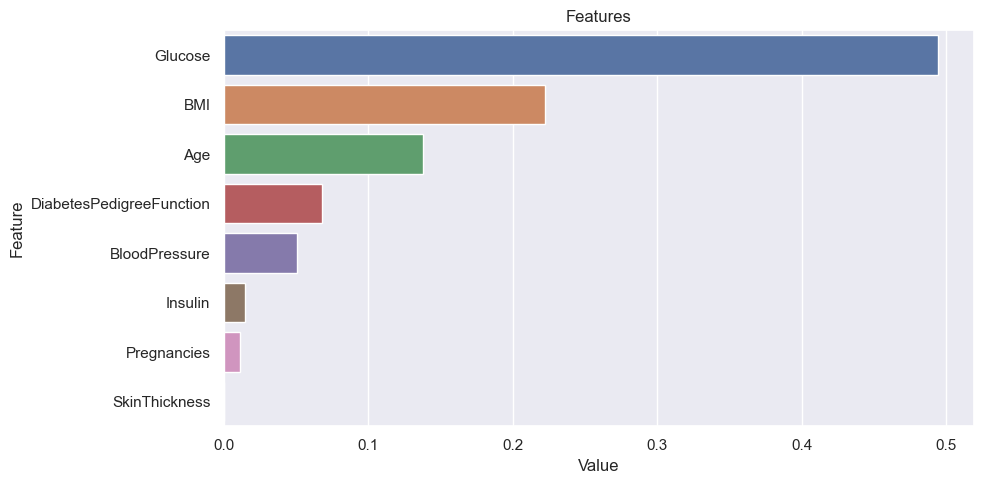

In [70]:
plot_importance(cart_final_model, X)

## 9) Analyzing Model Complexity with Learning Curves

In [74]:
train_score, test_score = validation_curve(cart_final_model, X, y,
                                           param_name='max_depth',
                                           param_range=range(1, 11),
                                           scoring='roc_auc',
                                           cv=10)

In [75]:
train_score

array([[0.72320885, 0.72306132, 0.68555095, 0.72350392, 0.71698479,
        0.7011941 , 0.66131397, 0.71142923, 0.71549128, 0.71120294],
       [0.7987598 , 0.79874136, 0.76659751, 0.8000461 , 0.80217151,
        0.77901798, 0.76472568, 0.79175657, 0.80145087, 0.79440771],
       [0.84255417, 0.84810512, 0.82195943, 0.84559705, 0.8434532 ,
        0.81859843, 0.82218534, 0.83455048, 0.8413315 , 0.84593664],
       [0.8834947 , 0.88264638, 0.86355002, 0.88926233, 0.88226372,
        0.87104195, 0.86404334, 0.87285846, 0.87436639, 0.87684114],
       [0.91531581, 0.9138497 , 0.89976487, 0.92513601, 0.91451821,
        0.90380821, 0.88505302, 0.90792531, 0.91068411, 0.90586318],
       [0.94068234, 0.94559244, 0.92840479, 0.94609959, 0.94535731,
        0.9309728 , 0.91167819, 0.93286307, 0.94030303, 0.93088154],
       [0.96760258, 0.96744583, 0.95147533, 0.96842785, 0.96832181,
        0.95850161, 0.93983864, 0.96071   , 0.96145546, 0.95757576],
       [0.97867681, 0.98590595, 0.9736606

In [76]:
test_score

array([[0.64777778, 0.64925926, 0.68074074, 0.64481481, 0.64222222,
        0.68481481, 0.63666667, 0.75333333, 0.71692308, 0.75615385],
       [0.73407407, 0.74888889, 0.73555556, 0.71592593, 0.61703704,
        0.77777778, 0.70481481, 0.82555556, 0.74615385, 0.80038462],
       [0.77666667, 0.81333333, 0.77222222, 0.68296296, 0.69296296,
        0.82925926, 0.79259259, 0.85814815, 0.72615385, 0.80807692],
       [0.75666667, 0.81148148, 0.74962963, 0.60740741, 0.70888889,
        0.82111111, 0.83851852, 0.87333333, 0.77038462, 0.81961538],
       [0.7437037 , 0.78666667, 0.76333333, 0.60037037, 0.71925926,
        0.84814815, 0.80074074, 0.88296296, 0.75730769, 0.81769231],
       [0.7237037 , 0.77962963, 0.7462963 , 0.59481481, 0.76259259,
        0.82814815, 0.81592593, 0.83185185, 0.76038462, 0.77692308],
       [0.73333333, 0.77888889, 0.75222222, 0.55777778, 0.71851852,
        0.75444444, 0.82481481, 0.8462963 , 0.67346154, 0.76961538],
       [0.69962963, 0.7137037 , 0.7522222

In [80]:
train_score_mean = np.mean(train_score, axis=1)
train_score_mean

array([0.70729413, 0.78976751, 0.83642714, 0.87603684, 0.90819184,
       0.93528351, 0.96013549, 0.97716774, 0.98781586, 0.99359846])

In [81]:
test_score_mean = np.mean(test_score, axis=1)
test_score_mean

array([0.68127066, 0.74061681, 0.77523789, 0.7757037 , 0.77201852,
       0.76202707, 0.74093732, 0.71424501, 0.70177635, 0.69428348])

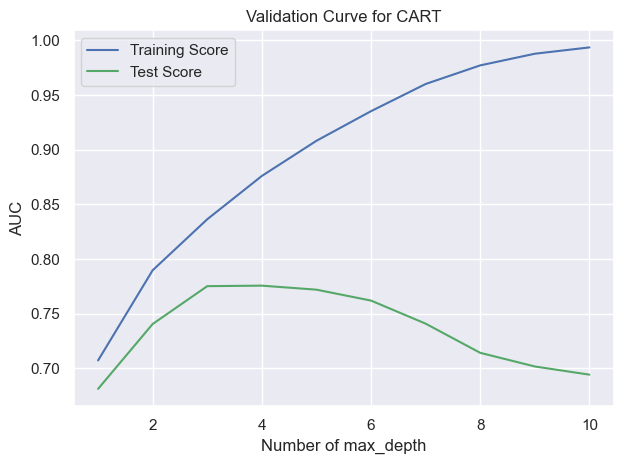

In [92]:
plt.plot(range(1, 11), train_score_mean, label='Training Score', color='b')
plt.plot(range(1, 11), test_score_mean, label='Test Score', color='g')
plt.title("Validation Curve for CART")
plt.xlabel("Number of max_depth")
plt.ylabel("AUC")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [93]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)

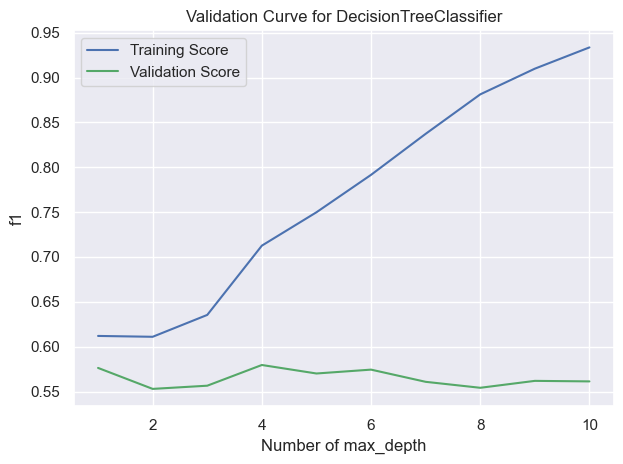

In [96]:
val_curve_params(cart_final_model, X, y, "max_depth", range(1, 11), scoring="f1")

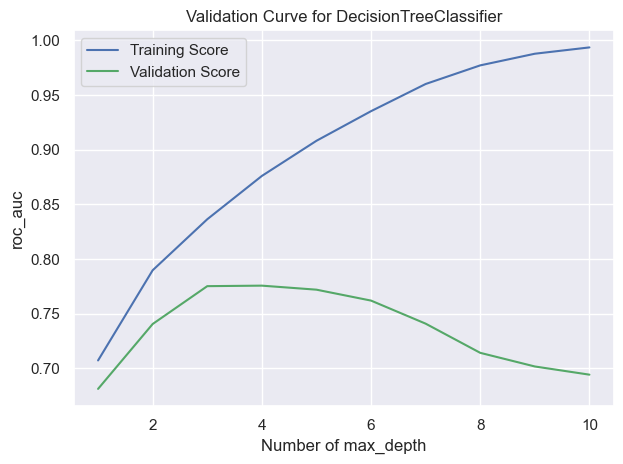

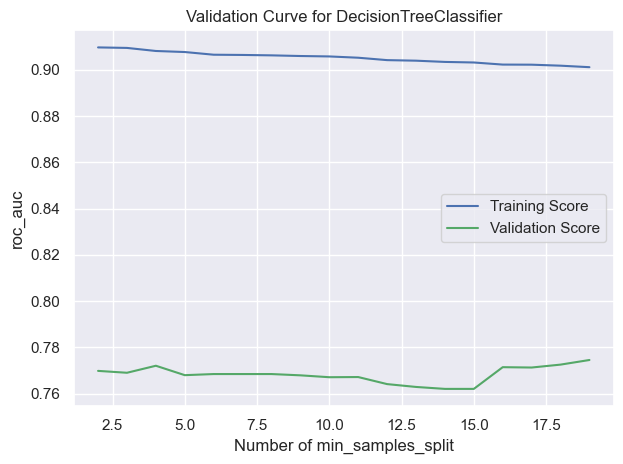

In [97]:
cart_val_params = [["max_depth", range(1, 11)], ["min_samples_split", range(2, 20)]]

for i in range(len(cart_val_params)):
    val_curve_params(cart_model, X, y, cart_val_params[i][0], cart_val_params[i][1])

## 9) Visualizing the Decision Tree

In [105]:
def tree_graph(model, col_names, file_name):
    tree_str = export_graphviz(model, feature_names=col_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(file_name)

In [108]:
tree_graph(model=cart_final_model, col_names=X.columns, file_name="cart_final.png")

## 10) Extracting Decision Tree

In [110]:
tree_rules = export_text(cart_final_model, feature_names=list(X.columns))
print(tree_rules)

|--- Glucose <= 0.25
|   |--- Age <= -0.03
|   |   |--- BMI <= 1.44
|   |   |   |--- BMI <= -0.11
|   |   |   |   |--- Pregnancies <= 0.90
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pregnancies >  0.90
|   |   |   |   |   |--- class: 1
|   |   |   |--- BMI >  -0.11
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.33
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.33
|   |   |   |   |   |--- class: 0
|   |   |--- BMI >  1.44
|   |   |   |--- BloodPressure <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  1.50
|   |   |   |   |--- class: 0
|   |--- Age >  -0.03
|   |   |--- BMI <= -0.61
|   |   |   |--- BMI <= -2.40
|   |   |   |   |--- class: 1
|   |   |   |--- BMI >  -2.40
|   |   |   |   |--- class: 0
|   |   |--- BMI >  -0.61
|   |   |   |--- Glucose <= -0.42
|   |   |   |   |--- Glucose <= -2.15
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Glucose >  -2.15
|   |   |   |   |   |--- class: 0
|   |   |  

## 11) Extracting Python Codes of Decision Rules

In [117]:
# !pip install scikit-learn==0.23.1

**Python Code**

In [129]:
pd.set_option('display.max_seq_items', None)

In [138]:
print(skompile(cart_final_model.predict).to('python/code'))

(((((0 if x[0] <= 0.9000000059604645 else 1) if x[5] <= 
    -0.11290322616696358 else 0 if x[6] <= 0.3346405327320099 else 0) if x[
    5] <= 1.4408602118492126 else 1 if x[2] <= 1.5 else 0) if x[7] <= 
    -0.029411764815449715 else (1 if x[5] <= -2.403225839138031 else 0) if 
    x[5] <= -0.6075268685817719 else (1 if x[1] <= -2.145454525947571 else 
    0) if x[1] <= -0.42424242198467255 else 0 if x[6] <= 0.4928104728460312
     else 1) if x[1] <= 0.2545454651117325 else (((0 if x[5] <= 
    -0.4139785021543503 else 1) if x[4] <= 0.8015716969966888 else 0) if x[
    1] <= 0.6909090876579285 else 0 if x[7] <= -0.20588235929608345 else 1 if
    x[7] <= 1.8823529481887817 else 0) if x[5] <= -0.22043010592460632 else
    ((1 if x[2] <= -0.6111111342906952 else 0) if x[7] <= 
    0.08823529444634914 else 1 if x[6] <= 0.14901961013674736 else 1) if x[
    1] <= 0.9818181991577148 else (1 if x[6] <= -0.1882352977991104 else 1) if
    x[4] <= 4.707268953323364 else 0)



**SQL Code**

In [119]:
print(skompile(cart_final_model.predict).to('sqlalchemy/sqlite'))

SELECT CASE WHEN (x2 <= 0.2545454651117325) THEN CASE WHEN (x8 <= -0.029411764815449715) THEN CASE WHEN (x6 <= 1.4408602118492126) THEN CASE WHEN (x6 <= -0.11290322616696358) THEN CASE WHEN (x1 <= 0.9000000059604645) THEN 0 ELSE 1 END ELSE 0 END ELSE CASE WHEN (x3 <= 1.5) THEN 1 ELSE 0 END END ELSE CASE WHEN (x6 <= -0.6075268685817719) THEN CASE WHEN (x6 <= -2.403225839138031) THEN 1 ELSE 0 END ELSE CASE WHEN (x2 <= -0.42424242198467255) THEN CASE WHEN (x2 <= -2.145454525947571) THEN 1 ELSE 0 END ELSE CASE WHEN (x7 <= 0.4928104728460312) THEN 0 ELSE 1 END END END END ELSE CASE WHEN (x6 <= -0.22043010592460632) THEN CASE WHEN (x2 <= 0.6909090876579285) THEN CASE WHEN (x5 <= 0.8015716969966888) THEN CASE WHEN (x6 <= -0.4139785021543503) THEN 0 ELSE 1 END ELSE 0 END ELSE CASE WHEN (x8 <= -0.20588235929608345) THEN 0 ELSE CASE WHEN (x8 <= 1.8823529481887817) THEN 1 ELSE 0 END END END ELSE CASE WHEN (x2 <= 0.9818181991577148) THEN CASE WHEN (x8 <= 0.08823529444634914) THEN CASE WHEN (x3 <= 

**Excel**

In [121]:
print(skompile(cart_final_model.predict).to('excel'))

A1=IF((x2<=0.2545454651 ...611 chars skipped... 68953323364),1,0))))


## 12) Prediction using Python Codes

In [135]:
def predict_with_rules(x):
    return (((((0 if x[0] <= 0.9000000059604645 else 1) if x[5] <= 
    -0.11290322616696358 else 0 if x[6] <= 0.3346405327320099 else 0) if x[
    5] <= 1.4408602118492126 else 1 if x[2] <= 1.5 else 0) if x[7] <= 
    -0.029411764815449715 else (1 if x[5] <= -2.403225839138031 else 0) if 
    x[5] <= -0.6075268685817719 else (1 if x[1] <= -2.145454525947571 else 
    0) if x[1] <= -0.42424242198467255 else 0 if x[6] <= 0.4928104728460312
     else 1) if x[1] <= 0.2545454651117325 else (((0 if x[5] <= 
    -0.4139785021543503 else 1) if x[4] <= 0.8015716969966888 else 0) if x[
    1] <= 0.6909090876579285 else 0 if x[7] <= -0.20588235929608345 else 1 if
    x[7] <= 1.8823529481887817 else 0) if x[5] <= -0.22043010592460632 else
    ((1 if x[2] <= -0.6111111342906952 else 0) if x[7] <= 
    0.08823529444634914 else 1 if x[6] <= 0.14901961013674736 else 1) if x[
    1] <= 0.9818181991577148 else (1 if x[6] <= -0.1882352977991104 else 1) if
    x[4] <= 4.707268953323364 else 0)

In [136]:
x = [12, 13, 20, 23, 4, 55, 12, 7]

predict_with_rules(x)

1

In [137]:
x = [6, 148, 70, 35, 0, 30, 0.62, 50]

predict_with_rules(x)

1

## 13) Saving and Loading Model

In [140]:
joblib.dump(cart_final_model, "cart_final.pkl")

cart_model_from_disc = joblib.load("cart_final.pkl")

x = [12, 13, 20, 23, 4, 55, 12, 7]

cart_model_from_disc.predict(pd.DataFrame(x).T)

array([1], dtype=int64)